In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Ex 3.1


The error function in matrix notation is:
$$
E_m[W, \lambda] = \frac{1}{2m} \|XW - Y\|^2 + \frac{\lambda}{2m} \|W_{1:n}\|^2
$$
where $\|W_{1:n}\|^2$ indicates the sum of squares of all elements of $W$ except for $w_0$.

The gradient of the empirical error function with respect to $W$ is:
$$
\nabla E_m[W, \lambda] = \frac{1}{m} X^\top(XW - Y) + \frac{\lambda}{m} \begin{bmatrix}0\\W_{1:n}\end{bmatrix}
$$
The gradient descent update rule with learning rate $\alpha$ is:
$$
W := W - \alpha \nabla E_m[W, \lambda]
$$
Expanding the update rule:
$$
W := W - \alpha \left(\frac{1}{m} X^\top(XW - Y) + \frac{\lambda}{m} \begin{bmatrix}0\\W_{1:n}\end{bmatrix}\right)
$$
This completes the gradient descent update rule in matrix notation.


In [47]:
data = pd.read_csv('poly.csv', delimiter=';')
x = data.iloc[:, 0].tolist()
y = data.iloc[:, 1].tolist()
X = np.array(x)
Y = np.array(y)
X = (x - np.mean(x)) / np.std(x)
Y = (y - np.mean(y)) / np.std(y)

In [54]:
def polynomial_regression(X, Y, degree):

    coefficients = np.polyfit(x, y, degree)
    w = np.poly1d(coefficients)
    return np.array(w)

def polynomial_features(input_data, degree):
    poly_features = [np.ones(input_data.shape[0])]
    for d in range(1, degree + 1):
        poly_features.append(input_data ** d)
    return np.column_stack(poly_features)

def error_function(x, y, w, lambd):
    m = len(x)
    y_pred = x.dot(w)
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2) + (lambd / (2 * m)) * np.sum(w[1:] ** 2)
    return cost

def gradient_descent(X, y, w, learning_rate, epochs, lambd):
    m = len(y)
    cost_history = []
    y = y.reshape(-1, 1)

    for epoch in range(epochs):
        h = X.dot(w)
        loss = h - y
        gradient = X.T.dot(loss) / m
        reg_term = (lambd / m) * np.copy(w)
        reg_term[0] = 0  
        gradient += reg_term
        w -= learning_rate * gradient
        cost = error_function(X, y, w, lambd)
        cost_history.append(cost)

    return w, cost_history

Y = Y.reshape(-1, 1) 
poly_features = polynomial_features(X, 3)
w_initial = np.zeros((poly_features.shape[1], 1))
result_w, cost_history = gradient_descent(poly_features, Y, w_initial, 0.01, 1000, 0.1)
print(result_w, cost_history)



[[-0.2933784 ]
 [-0.17198891]
 [ 0.30492267]
 [-0.41473824]] [0.4598379399195562, 0.42320990635446837, 0.3898026250720793, 0.35933065035835804, 0.3315338904788348, 0.3061753532975649, 0.28303909246100223, 0.2619283362976536, 0.24266378317312132, 0.2250820484874563, 0.20903424982022506, 0.19438471792979747, 0.18100982240756502, 0.16879690178458467, 0.15764328879620984, 0.1474554223375014, 0.13814803839580825, 0.12964343293342415, 0.12187079031863474, 0.11476557147320737, 0.10826895642340312, 0.10232733641441556, 0.0968918511788819, 0.09191796734251291, 0.08736509430736011, 0.08319623427889691, 0.0793776633997566, 0.07587864122323916, 0.07267114600590467, 0.06972963352287018, 0.06703081731375846, 0.06455346845339446, 0.06227823311092617, 0.060187466315532574, 0.05826508048762093, 0.05649640742262803, 0.05486807253134288, 0.053367880247076456, 0.05198470960694215, 0.05070841910282243, 0.04952975997805062, 0.048440297219129305, 0.047432337558579764, 0.04649886386584501, 0.04563347535858823

Degree 0: Weights: [-1.66216247e-16]
Degree 1: Weights: [-6.24500451e-17 -9.00613375e-01]
Degree 2: Weights: [-0.28097529 -0.90516969  0.28574485]
Degree 3: Weights: [-0.29839707 -0.17079466  0.31022219 -0.41700859]
Degree 4: Weights: [-0.23208147 -0.16411882  0.06601853 -0.42363755  0.09928169]
Degree 5: Weights: [-0.23164917 -0.2474489   0.06612529 -0.31524329  0.09943299 -0.02954024]
Degree 6: Weights: [-0.23223987 -0.24789846  0.08592591 -0.31598646  0.10592366 -0.02863113
 -0.00745653]


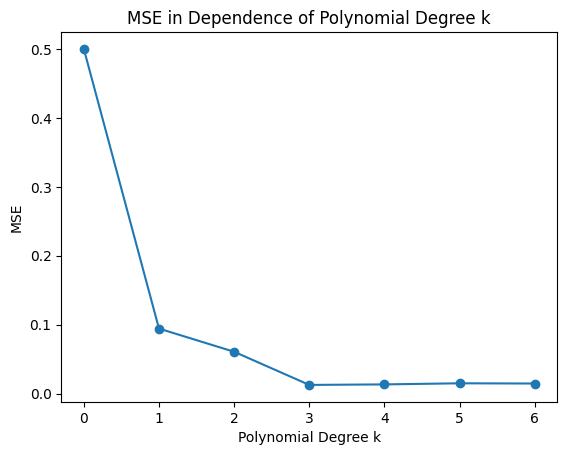

In [33]:
def error_function_without_regularization(X, y, w):
    m = len(y)
    y_pred = X.dot(w)
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    return cost

def gradient_without_regularization(X, y, w, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        h = X.dot(w)
        loss = h - y
        gradient = X.T.dot(loss) / m
        w -= learning_rate * gradient
        cost_history.append(error_function_without_regularization(X, y, w)) 

    return w, cost_history




w_plot = []
mse_plot = []
for degree in range(7):
    poly_features = polynomial_features(X, degree)
    w_initial = np.zeros(poly_features.shape[1]) 
    result_w, cost_history = gradient_without_regularization(poly_features, Y, w_initial, 0.01, 1000)
    w_plot.append(result_w)
    mse_plot.append(cost_history[-1]) 
    print(f"Degree {degree}: Weights: {result_w}")

plt.plot(range(7), mse_plot, marker='o')
plt.xlabel('Polynomial Degree k')
plt.ylabel('MSE')
plt.title('MSE in Dependence of Polynomial Degree k')
plt.show()

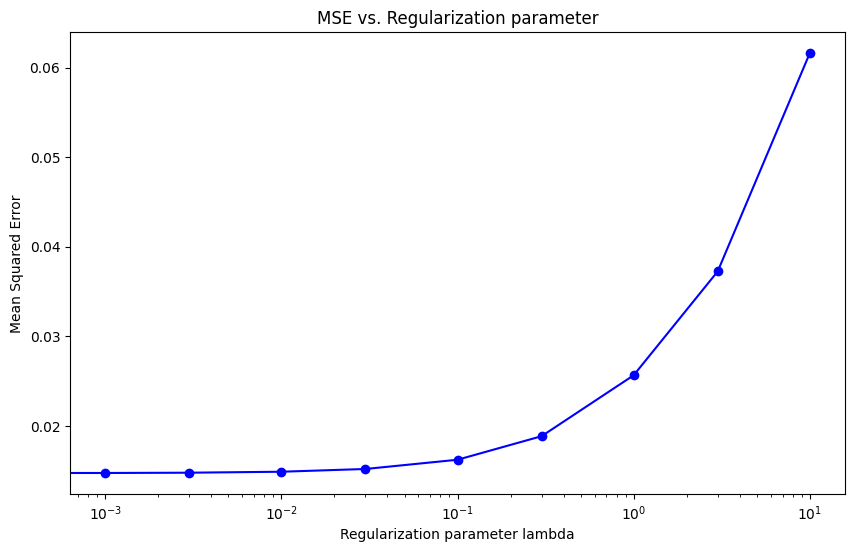

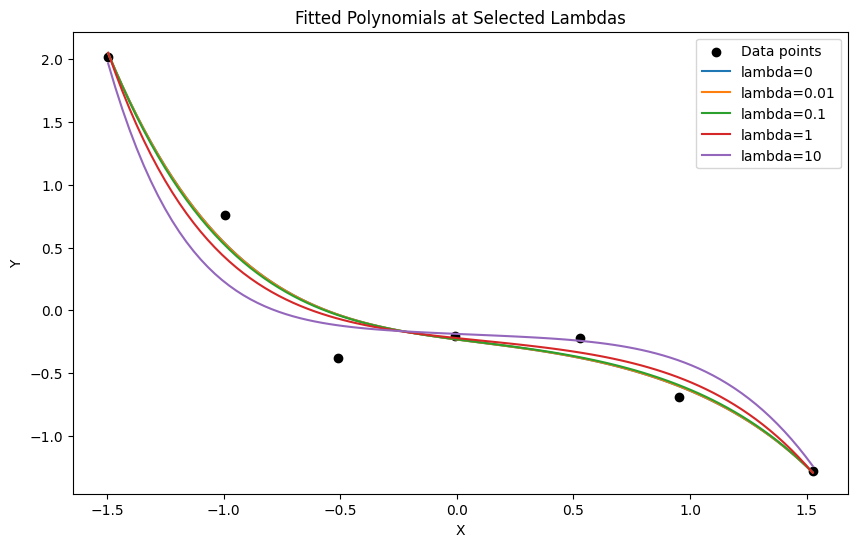

Weights for lambda=0: [-0.23223987 -0.24789846  0.08592591 -0.31598646  0.10592366 -0.02863113
 -0.00745653]
Weights for lambda=0.01: [-0.23210306 -0.24723824  0.0857184  -0.31467886  0.10546717 -0.02935061
 -0.00721428]
Weights for lambda=0.1: [-0.23089467 -0.2414457   0.08386469 -0.30339508  0.1015203  -0.03557461
 -0.00511079]
Weights for lambda=1: [-0.22080597 -0.1956392   0.06735205 -0.2258933   0.07396398 -0.07922012
  0.01009143]
Weights for lambda=10: [-0.18753405 -0.08045791  0.02199276 -0.10575663  0.02993078 -0.14592204
  0.03501961]


In [55]:
lambdas = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
mse_values = []
weights = []

for lambd in lambdas:
    poly_features = polynomial_features(X, 6) 
    w_initial = np.zeros((poly_features.shape[1], 1)) 
    w, cost_history = gradient_descent(poly_features, Y, w_initial, 0.01, 1000, lambd)
    mse_values.append(cost_history[-1]) 
    weights.append(w.flatten())

plt.figure(figsize=(10, 6))
plt.plot(lambdas, mse_values, 'bo-')
plt.xscale('log')
plt.xlabel('Regularization parameter lambda')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Regularization parameter')
plt.show()


selected_lambdas = [0, 0.01, 0.1, 1, 10]
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='black', label='Data points')

x_values = np.linspace(min(X), max(X), 100)
for lambd in selected_lambdas:
    index = np.where(lambdas == lambd)[0][0] 
    w = weights[index]
    poly_eqn = np.poly1d(w[::-1])
    plt.plot(x_values, poly_eqn(x_values), label=f'lambda={lambd}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitted Polynomials at Selected Lambdas')
plt.legend()
plt.show()

for lambd in selected_lambdas:
    index = np.where(lambdas == lambd)[0][0]
    print(f"Weights for lambda={lambd}: {weights[index]}")


** As we can see in the two figures. The first figure shows that the MSE error will incrase as the parameter becomes larger. However, in the second picture we can see that a larger lambda will fit the data point better. Maybe one more error function will be helpful for choosing the suitable lambda**

## Ex. 3.5

1. 
In the context of multiple linear regression, the solution to the system $Xw = y$ is given by the normal equation:

$$
X^{\top}Xw = X^{\top}y
$$

This system has a unique solution if the matrix $X^{\top}X$ is invertible, which is the case if $\operatorname{rank}(X^{\top}X) = n+1$. By the given linear algebra results, we know that $\operatorname{rank}(X) = \operatorname{rank}(X^{\top}) = \operatorname{rank}(X^{\top}X)$. Thus, if $\operatorname{rank}(X) = n+1$, it implies that $X^{\top}X$ is of full rank and hence invertible, guaranteeing a unique solution for $w$.

2. 
A necessary condition for $\operatorname{rank}(X) = n+1$ is that $m \geq n+1$. This is because the rank of a matrix cannot exceed the lesser of its dimensions. Therefore, for $X$ to be of full column rank.

3. 
If $\operatorname{rank}(X) < n + 1$, then $X^{\top}X$ is not of full rank, which implies that it is not invertible. In this case:

- A solution $w$ may still exist, but it will not be unique.
- The solution space is a subspace of $\mathbb{R}^{n+1}$ with dimension greater than 1.
- The existence and form of solutions will depend on the output vector $y$. Specifically:
  - If $y$ lies in the image of $X$, $\operatorname{im}(X)$, which is the same as $\operatorname{im}(X^{\top}X)$ by result (2), then a solution exists.
  - This solution will not be unique because there are infinitely many ways to express $y$ as a combination of the non-independent columns of $X$.
  - If $y$ does not lie in the image of $X$, then no solutions exist, as there is no $w$ such that $Xw= y$.

This can be further elucidated by considering the concatenated matrix $[X|y]$:

- If $\operatorname{rank}(X) = \operatorname{rank}([X|y]) < n+1$, then by result (3b), there are infinitely many solutions.
- If $\operatorname{rank}(X) < \operatorname{rank}([X|y])$, then by result (3c), there is no solution since $y$ is outside the image of $X$.

In summary, for a unique solution in multiple linear regression, it is necessary that $X$ be of full column rank and that $m \geq n+1$. When $X$ is not of full rank, the uniqueness of the solution is not guaranteed and depends on whether $y$ is in the image of $X$.
